In [2]:
import json
import os,io
import proto
from google.cloud import vision

client = vision.ImageAnnotatorClient.from_service_account_json('google-vision-api(1).json')
from PIL import Image
def open_image(path):
    return Image.open(path)
def gvision_to_text(s):
    json_string = proto.Message.to_json(s)
    x = json.loads(json_string)

    text = x['textAnnotations'][0]['description']
    text = text.replace('\n', ' ')
    return text

def get_vision(path):
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)
    response = client.document_text_detection(image=image)
  # json_string = proto.Message.to_json(response)

    return gvision_to_text(response)
def get_res(path):
    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)
    response = client.document_text_detection(image=image)
    json_string = proto.Message.to_json(response)
    
    return json_string

In [4]:
res = get_vision('image.png')

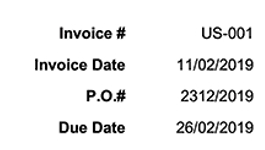

In [5]:
open_image('image.png')

In [6]:
path = 'image.png'

In [7]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.cluster import DBSCAN


def get_cent(a, b):
    x_cent = (a['x'] + b['x'])/2
    y_cent =  (a['y'] + b['y'])/2
    return x_cent, y_cent
def gsort(a):
    return a['boundingPoly']['vertices'][0]['x']
def get_text_rec(json_string):
    lst = json.loads(json_string)['textAnnotations']  
    lst = lst[1:]    
    cent = []
    char_ht = []
    for i in lst:
        cent_x, cent_y = get_cent(i['boundingPoly']['vertices'][0] , i['boundingPoly']['vertices'][2])
        char_ht.append(-i['boundingPoly']['vertices'][0]['y'] + i['boundingPoly']['vertices'][3]['y']) 
        cent.append([cent_x, cent_y])
    av_char_ht = np.mean(char_ht)
    x_fitted= [[i[1],1] for i in cent]
    db = DBSCAN(eps = av_char_ht*0.4,min_samples = 1)
    db.fit(x_fitted)
    df = pd.DataFrame()

    df['points'] = [i[0] for i in x_fitted]
    df['labels'] = [i[0] for i in (db.labels_.reshape(-1,1))]
    df['ax'] = 1
    label_rank = df.groupby('labels').mean().reset_index().drop('ax', axis = 1).sort_values('points').labels.values
    label_map = dict()
    for i in range(len(label_rank)):
        label_map[i] = label_rank[i]
    df['drank'] = df.labels.apply(lambda x: label_map[x])
    boxes=  []
    for i, j in enumerate(lst):
        j['line_number'] = list(df.drank.values)[i]
    lines = dict()
    for i in lst:
        lines[i['line_number']] = []
    for i in lst:
        lines[i['line_number']].append(i)
    ans = ""
    for i in lines:
       
        lines[i].sort(key = gsort)
        for j in lines[i]:
            
            ans+=j['description']
            ans+=" "
    return ans

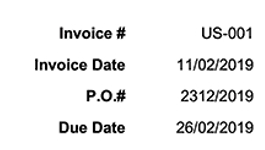

In [8]:
open_image('image.png')

# The difference it makes!

In [9]:
get_text_rec(get_res('image.png'))

'Invoice # US - 001 Invoice Date 11/02/2019 P.O. # 2312/2019 Due Date 26/02/2019 '

In [11]:
get_vision('image.png')

'US-001 Invoice # Invoice Date 11/02/2019 P.O.# 2312/2019 Due Date 26/02/2019 '

### Making NER data


In [12]:
cd D:\Projects\EPowerX\invoice_details


D:\Projects\EPowerX\invoice_details


In [13]:
import os
imgs = []
for i in os.listdir():
    imgs.append(open_image(i));

In [19]:
import matplotlib.pyplot as plt



Text ==>  INVOICE # 123456 


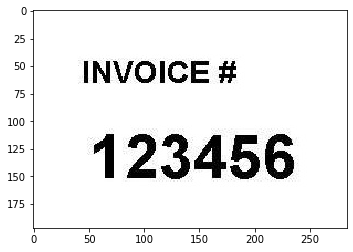



Text ==>  DATE 12/31/20 


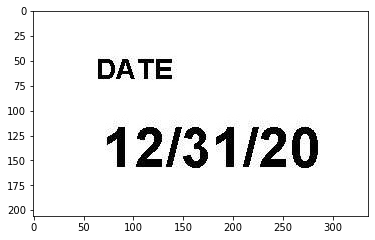



Text ==>  AMOUNT DUE $ 0000.00 


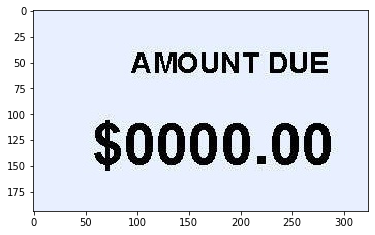



Text ==>  INVOICE DUE DATE 12/31/20 


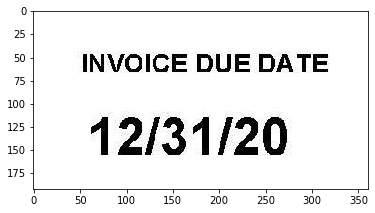



Text ==>  Invoice # : 10643 Invoice Date : 09/25/15 


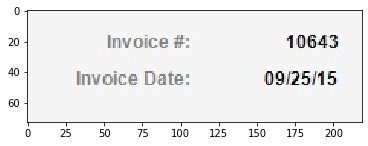



Text ==>  INVOICE DATE 2034 2/21/2018 CUSTOMER ID TERMS 564 Due Upon Receipt 


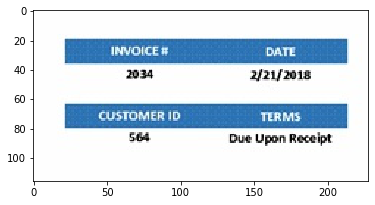



Text ==>  Invoice # 8 Issue Date 07/21/2018 


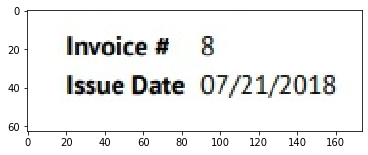



Text ==>  INVOICE NO : 2491839 


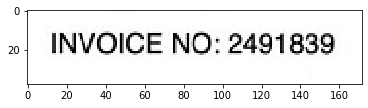



Text ==>  DATE : 24/06/2019 


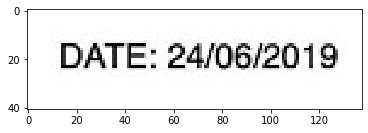



Text ==>  Invoice No : 201000 Invoice Date : May 27th 2020 


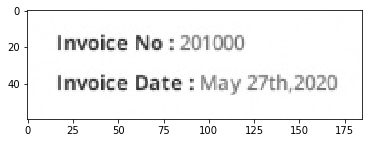



Text ==>  Invoice Number : 3403 POR : Invoice Date : 01/21/2019 Payment Due : 03/02/2019 Amount Due ( USD ) : $ 2,644.18 


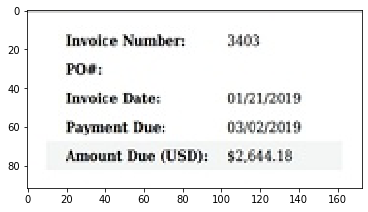



Text ==>  INVOICE # US - 001 INVOICE DATE 11/02/2019 P.O. # 2312/2019 DUE DATE 26/02/2019 


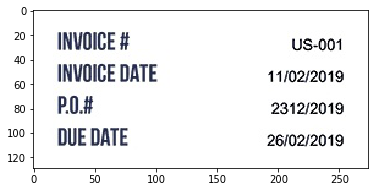



Text ==>  Invoice # INV - 000136 


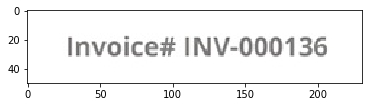



Text ==>  Balance Due $ 270.000 


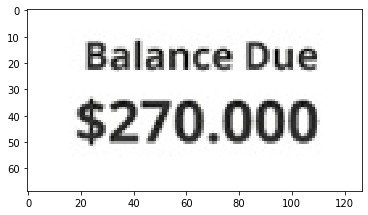



Text ==>  Invoice Date : 14 Dec 2016 Terms : Due on Receipt Due Date : 14 Dec 2016 Project Name : Design 


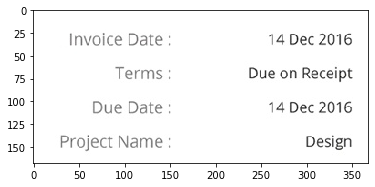



Text ==>  Invoice No : 477 


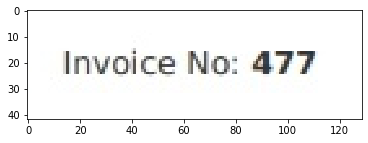



Text ==>  Invoice Date : Jan 24 , 2020 Payment Due Date : Feb 3 , 2020 Ship By Date : ASAP Sales Rep : Hasan Nasir 


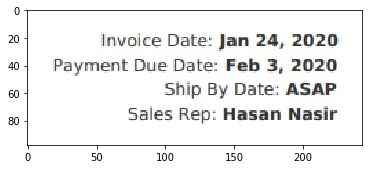



Text ==>  DUE DATE : : July 18 , 2020 


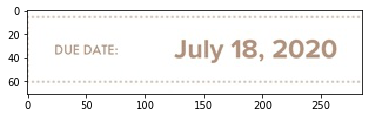



Text ==>  PRO FORMA INVOICE : 90001 ISSUE DATE : July 3 , 2020 DUE DATE : July 18 , 2020 


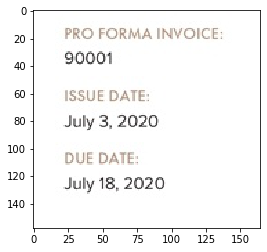



Text ==>  Invoice Date 11/02/2019 P.O. # 2312/2019 Due Date 26/02/2019 


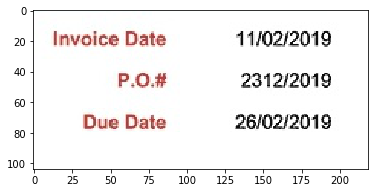



Text ==>  Invoice Number 000000 Date Of Issue 10/07/14 


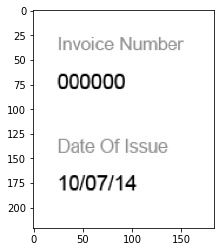



Text ==>  Invoice Total $ 4520.00 


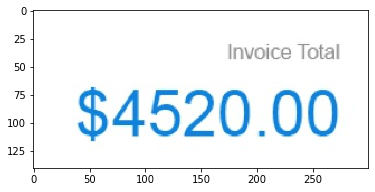



Text ==>  Invoice # US - 001 Invoice Date 11/02/2019 P.O. # 2312/2019 Due Date 26/02/2019 


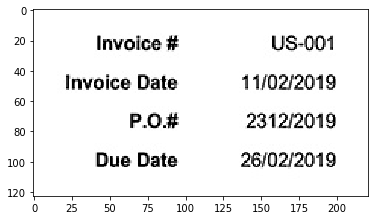



Text ==>  Invoice Number 000000 Date Of Issue 10/07/14 


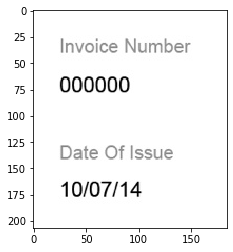



Text ==>  Invoice Total $ 4520.00 


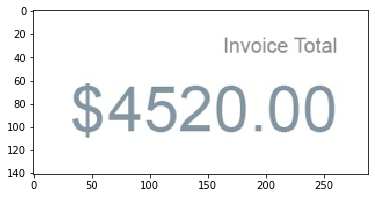



Text ==>  INVOICE 00-000000 


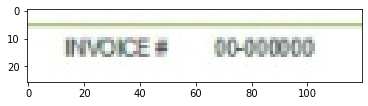



Text ==>  DATE 6/24/2013 


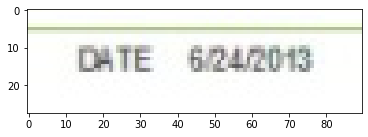



Text ==>  Number INV - 27 Issue Date Oct 4 , 2018 Due Date Nov 3 , 2018 Amount Payable $ 1,051.60 


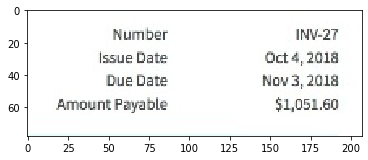



Text ==>  Invoice No : INVO2081 Invoice Date : 11/11/18 Due Date : 12/01/18 


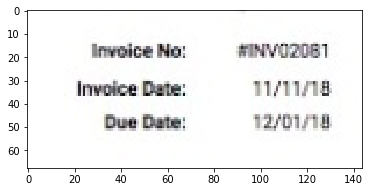



Text ==>  Invoice 5396 Date 2017/03/17 Due date 2017/03/24 


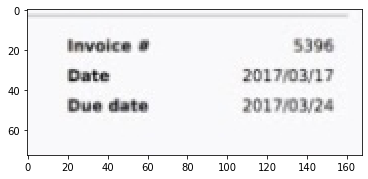



Text ==>  Invoice ID : INV / 20111209-22 Invoice date : 12/08/2011 Due date : 12/25/2012 Text custom field : Visible field in PDF 


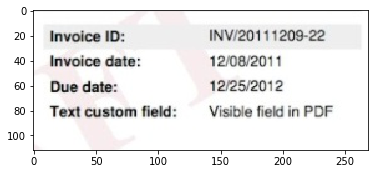



Text ==>  Amount Due $ 283.34 


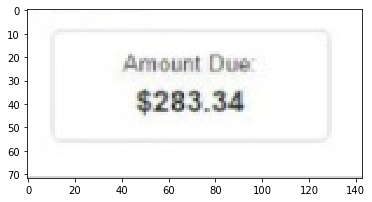



Text ==>  Invoice number : INV 102953 Invoice date : : 2/25/2016 Payment terms : Due on receipt Due date : 2/25/2016 


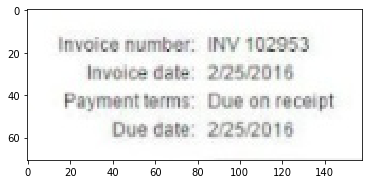



Text ==>  Number INV - 27 Issue Date Jun 1 , 2019 Due Date Jul 31 , 2019 Amount Payable $ 846.80 


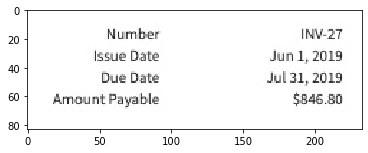



Text ==>  Invoice Date : 18/03/2021 Invoice Number : 1234 Client Reference : Purchase Order : DUE DATE : 18/03/2021 


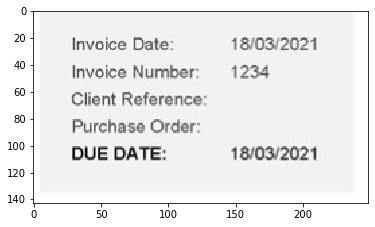



Text ==>  Invoice No. BHIN201920021 Invoice Date 03/10/2020 


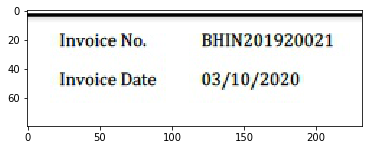



Text ==>  Invoice No. BHIN201920009 Invoice Date 23/07/2020 


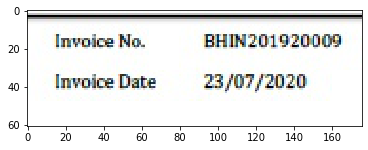



Text ==>  Involce Number : 3403 POS : Invoice Date : 01/21/2019 Payment Due : 03/02/2019 Amount Due ( USD ) : $ 2,644.18 


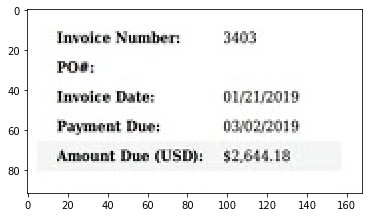



Text ==>  DATE : January 1 , 2005 


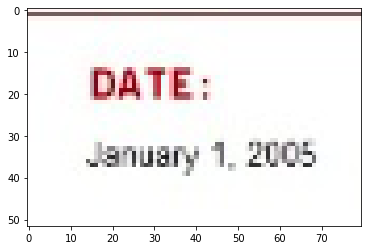



Text ==>  INVOICE # in0001 


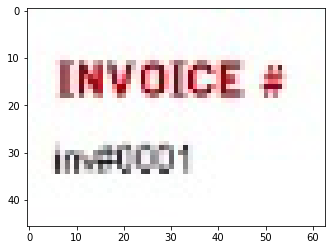



Text ==>  INVOICE NUMBER 00001 


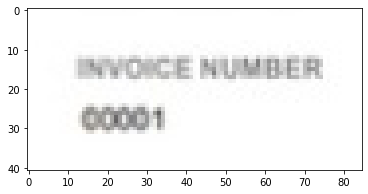



Text ==>  DATE OF ISSUE mddy 


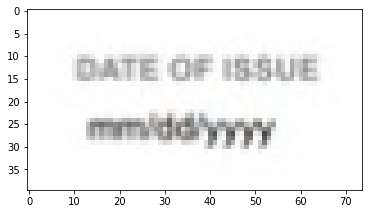



Text ==>  INVOICE 123456 DATE 1203120 INVOICE DUE DATE 12/31/20 


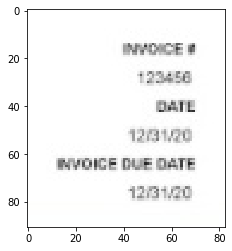



Text ==>  Invoice number INV - 000123 


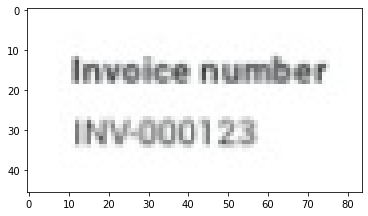



Text ==>  Date of Issue 18/09/2018 Due Date 18/09/2018 


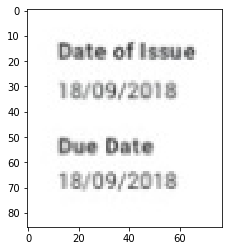



Text ==>  Invoice # 0002 Issued : Oct 21 , 2020 Due : Oct 21 , 2020 


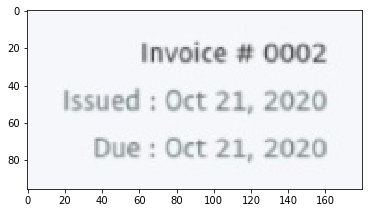



Text ==>  INVOICE 00-000000 


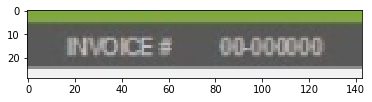



Text ==>  DATE 6/24/2013 


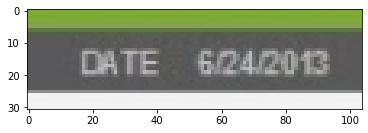



Text ==>  Invoice1 Invoice Date 03/01/2017 For Services Through 03/01/2017 Terms NA 


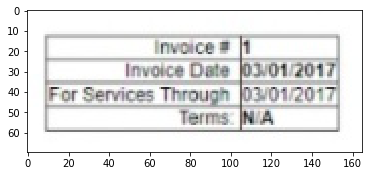



Text ==>  Involce Number OS356748 Invoice Date 6/5/2010 


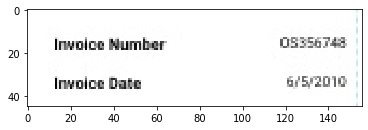



Text ==>  Invoice Date : Jan 24 , 2020 Payment Due Date : Feb 3 , 2020 Ship By Date : ASAP Sales Rep : Hasan Nasir 


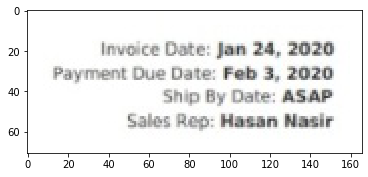



Text ==>  Invoice No : 477 


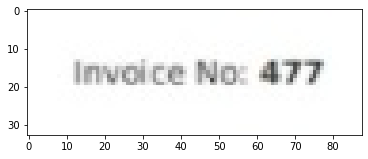



Text ==>  INVOICE # 1012 DATE 11/08/2019 DUE DATE 12/08/2019 TERMS Net 30 


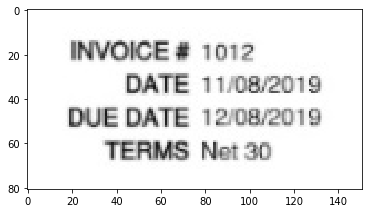



Text ==>  INVOICE 


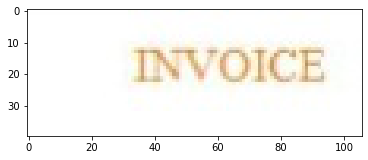



Text ==>  DATE 9/15/2015 


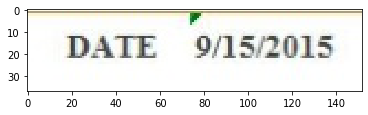



Text ==>  INVOICE # 00-000000 WORK ORDER # 00-000000 


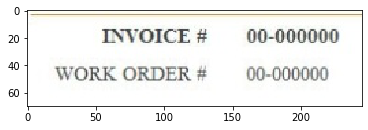



Text ==>  Invoice Number : 14 P.O./S.O . Number : AD29094 Invoice Date : 2018-09-25 Payment Due : Upon receipt Amount Due ( USD ) : $ 2,608.20 


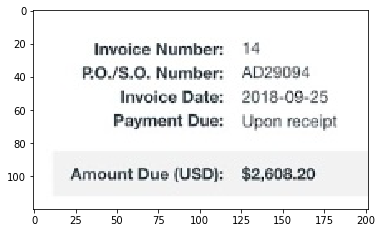



Text ==>  Date : Tuesday 30 May 2017 Invocie # : 4021 


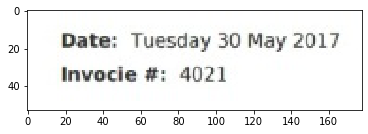



Text ==>  Invoice # 4021 


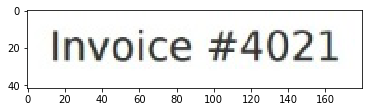



Text ==>  Invoice Number 0000001 


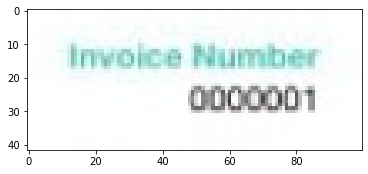



Text ==>  Amount Due ( USD ) $ 2,000.00 


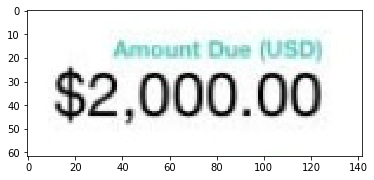



Text ==>  Invoice Date : 09/20/16 Number : Amount : $ 1,100.00 Terms : Job Id : 10708 


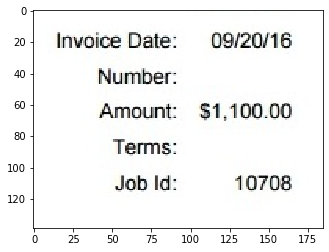

In [18]:
inv_text = []
for i in os.listdir():
    inv_text.append(get_text_rec(get_res(i)))
    print("Text ==> ", inv_text[-1])
    plt.imshow(open_image(i))
    plt.show()
    print("\n\n", "="*100)
    

In [21]:
cd ..

D:\Projects\EPowerX


In [22]:
cd ner

D:\Projects\EPowerX\ner


In [23]:
res = ""
for i in inv_text:
    res+=i
    res+='\n'

In [26]:
with open('invoice_details_rectified.txt', 'w') as file:
    file.write(res)

In [28]:
file.close()

In [31]:
import json
with open('training_data_rectified.json', 'r') as file:
    x = json.load(file)

In [32]:
x

{'classes': ['INVOICE NUMBER', 'INVOICE DATE', 'DUE DATE'],
 'annotations': [['INVOICE #123456',
   {'entities': [[10, 16, 'INVOICE NUMBER']]}],
  ['DATE 12/31/20', {'entities': [[5, 13, 'INVOICE DATE']]}],
  ['AMOUNT DUE $0000.00', {'entities': []}],
  ['INVOICE DUE DATE 12/31/20', {'entities': [[17, 25, 'DUE DATE']]}],
  ['Invoice #: 10643 Invoice Date : 09/25/15',
   {'entities': [[12, 17, 'INVOICE NUMBER'], [33, 41, 'INVOICE DATE']]}],
  ['INVOICE DATE 2034 2/21/2018 CUSTOMER ID TERMS 564 Due Upon Receipt',
   {'entities': [[18, 27, 'INVOICE DATE']]}],
  ['Invoice #8 Issue Date 07/21/2018',
   {'entities': [[10, 11, 'INVOICE NUMBER'], [23, 33, 'INVOICE DATE']]}],
  ['INVOICE NO : 2491839', {'entities': [[13, 20, 'INVOICE NUMBER']]}],
  ['DATE : 24/06/2019', {'entities': [[7, 17, 'INVOICE DATE']]}],
  ['Invoice No : 201000 Invoice Date: May 27th 2020',
   {'entities': [[13, 19, 'INVOICE NUMBER'], [35, 48, 'INVOICE DATE']]}],
  ['Invoice Number : 3403 POR: Invoice Date : 01/21/2019 P